<a href="https://colab.research.google.com/github/JacobPerez036/Intersemestral_notas_31_ene_2025/blob/main/TP1/PSO_15_enero_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

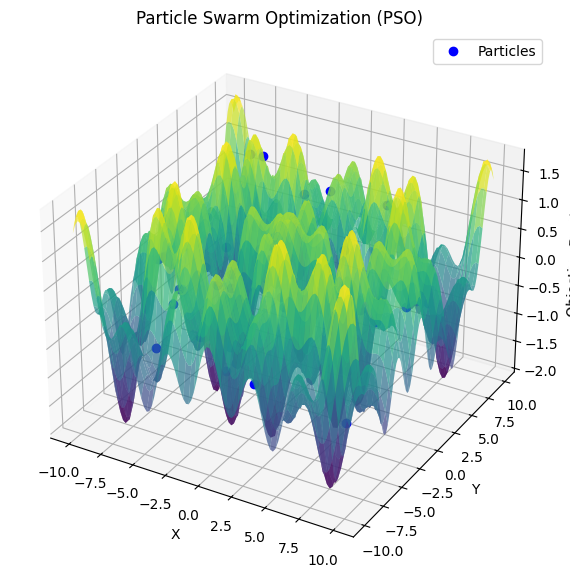

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def objective_funtion(x,y):
    return np.sin(np.sqrt(x**2 + y**2)) + 0.5 * np.cos(2 * x) + 0.5 * np.cos(2 * y)

num_particles = 50
iterations = 100
inertia = 0.5
cognitive = 1.5
social = 1.5

x_min, x_max = -10, 10
y_min, y_max = -10,10
vel_min, vel_max = -1, 1

positions = np.random.uniform([x_min, y_min], [x_max, y_max], (num_particles,2))
velocities = np.random.uniform(vel_min, vel_max, (num_particles, 2))

personal_best_positions = np.copy(positions)
personal_best_scores = objective_funtion(personal_best_positions[:, 0], personal_best_positions[:, 1])
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min,y_max,100)
x, y = np.meshgrid(x, y)
z = objective_funtion(x, y)

ax.plot_surface(x, y, z, cmap='viridis', alpha=0.7, edgecolor='none')
ax.set_title('Particle Swarm Optimization (PSO)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective Funtion')
particles_plot, = ax.plot([], [], [], 'bo', label='Particles')
ax.legend()

for iteration in range(iterations):

    scores = objective_funtion(positions[:, 0], positions[:, 1])

    for i in range(num_particles):
        if scores[i] < personal_best_scores[i]:
          personal_best_scores[i] = scores[i]
          personal_best_positions[i] = positions[i]

    if np.min(personal_best_scores) < global_best_score:
        global_best_score = np.min(personal_best_scores)
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]


    for i in range(num_particles):
        r1, r2 = np.random.random(), np.random.random()
        velocities[i] = (
            inertia * velocities[i]
            + cognitive * r1 * (personal_best_positions[i] - positions[i])
            + social * r2 * (global_best_position - positions[i])
        )
        velocities[i] = np.clip(velocities[i], vel_min, vel_max)
        positions[i] += velocities[i]
        positions[i][0] = np.clip(positions[i][0], x_min, x_max)
        positions[i][1] = np.clip(positions[i][1], y_min, y_max)


    particles_plot.set_data(positions[:, 0], positions[:, 1])
    particles_plot.set_3d_properties(objective_funtion(positions[:, 0], positions[:, 1]))
    plt.pause(0.1)
plt.show()